<a href="https://colab.research.google.com/github/PAastha/TIMESERIESANALYSIS/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
lags= previous no. of observations
ACFis used to calcualte the lag number for Autoregressive component
seasonal data--->PACF seasonality only in specific high and low else below the boundary
-->seasonal(p,d,q,s)
arima model-->> check for the data stationary
dickey-fuller test
H0=>unit root=1==>data is not stationary
H1=>unit root<1==>data is  stationary
'''
'''
=>mean shoud be constant
==>SD should be constant
'''
'''
If the p-value is less than a chosen significance level (e.g., 0.05),
then the null hypothesis of non-stationarity is rejected, and the time
series is considered stationary. Otherwise, if the p-value is greater
than the significance level, the null hypothesis is not rejected, and
the time series is considered non-stationary.'''

'''
ARIMA(p, d, q)
p=pacf=ma
q=acf=ar
'''




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
%matplotlib inline


In [2]:
df_airlines=pd.read_csv('/content/airline_passengers.csv')
df_airlines.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_airlines.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airlines.dropna(axis=0,inplace=True)

In [6]:
df_airlines.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airlines['Month']=pd.to_datetime(df_airlines['Month'])

In [9]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airlines.set_index('Month',inplace=True)

In [11]:
df_airlines.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

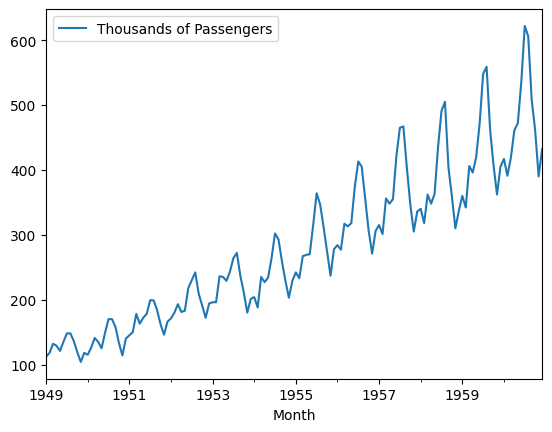

In [12]:
df_airlines.plot()

Seasonal data is generally not considered stationary. Seasonality refers to the presence of repeating patterns or cycles in a time series that occur at regular intervals. For example, sales data may exhibit a regular seasonal pattern with peaks during certain months or seasons each year, or temperature data may show a seasonal pattern with hotter temperatures during the summer and colder temperatures during the winter.

Stationarity, on the other hand, refers to a time series with statistical properties that do not change over time. A stationary time series has a constant mean, constant variance, and constant autocorrelation structure, which makes it easier to model and forecast.

Seasonal data typically violates the stationarity assumption because the mean and variance change over time due to the repeating seasonal patterns. For instance, the mean sales during summer months might be higher than during winter months, leading to non-constant mean. Similarly, the variance of temperature data may be higher during extreme weather months.

When dealing with seasonal data, it is common to apply a process called seasonal differencing to remove the seasonality and make the data stationary. Seasonal differencing involves taking the difference between the observed value and the value from the same season in the previous year. By removing the seasonal component, we can analyze and model the underlying non-seasonal patterns more effectively.

Once the data has been made stationary through differencing, we can then apply time series models like Seasonal ARIMA (SARIMA) to capture both the seasonal and non-seasonal patterns in the data. SARIMA is an extension of the ARIMA model that takes into account seasonal components in addition to autoregressive and moving average components.

In summary, seasonal data is typically non-stationary due to the presence of repeating patterns, and it requires preprocessing like seasonal differencing before applying time series models.

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
  result=adfuller(series)
  print('ADF STATISTICS :{}'.format(result[0]))
  print('p-value: {}'.format(result[1]))
  if result[1] <=0.05:
    print('strong evidence against the null hypothesis, reject null hypo.Data is stationary')
  else:
    print('weak evidence against null hypo,indicating non-stationary')

In [16]:
adf_test(df_airlines['Thousands of Passengers'])

ADF STATISTICS :0.8153688792060498
p-value: 0.991880243437641
weak evidence against null hypo,indicating non-stationary


In [17]:
###USE TECHNIQUES DIFFERENCING
df_airlines['First passenger difference']=df_airlines['Thousands of Passengers']-df_airlines['Thousands of Passengers'].shift(1)

In [18]:
df_airlines.head()

,Thousands of Passengers,First passenger difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [22]:
adf_test(df_airlines['First passenger difference'].dropna())


ADF STATISTICS :-2.8292668241700047
p-value: 0.05421329028382478
weak evidence against null hypo,indicating non-stationary


In [23]:
###USE TECHNIQUES DIFFERENCING
df_airlines['Second passenger difference']=df_airlines['First passenger difference']-df_airlines['First passenger difference'].shift(1)

In [24]:
adf_test(df_airlines['Second passenger difference'].dropna())


ADF STATISTICS :-16.384231542468513
p-value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject null hypo.Data is stationary


###12 months

In [29]:
###USE TECHNIQUES DIFFERENCING
df_airlines[' passenger 12 difference']=df_airlines['Thousands of Passengers']-df_airlines['Thousands of Passengers'].shift(12)

In [30]:
adf_test(df_airlines[' passenger 12 difference'].dropna())


ADF STATISTICS :-3.383020726492481
p-value: 0.011551493085514952
strong evidence against the null hypothesis, reject null hypo.Data is stationary


In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

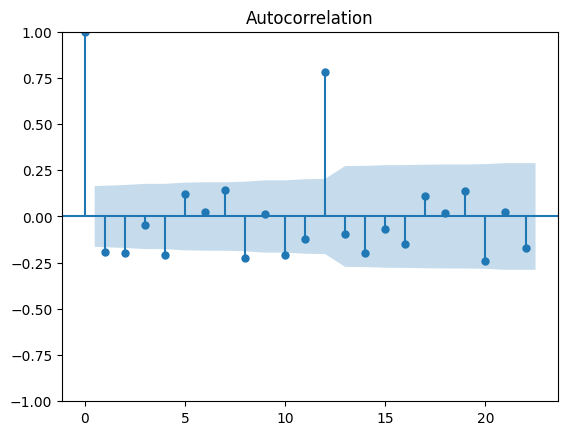

In [31]:
acf=plot_acf(df_airlines['Second passenger difference'].dropna())

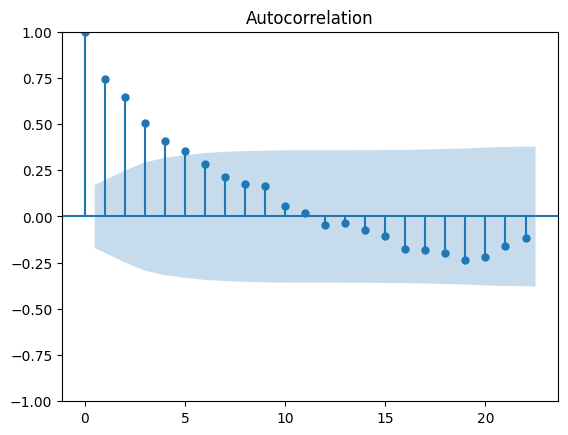

In [32]:
acf12=plot_acf(df_airlines[' passenger 12 difference'].dropna())

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


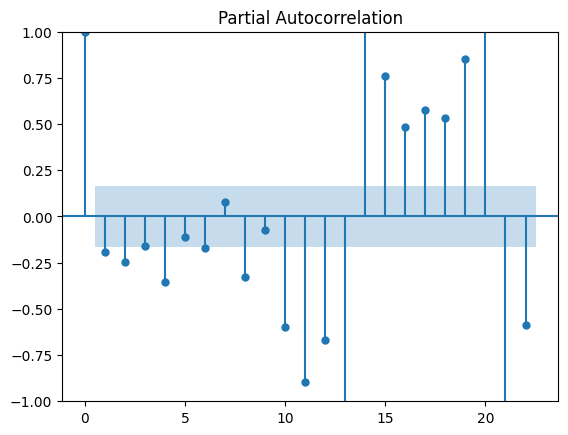

In [28]:
pacf=plot_pacf(df_airlines['Second passenger difference'].dropna())

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


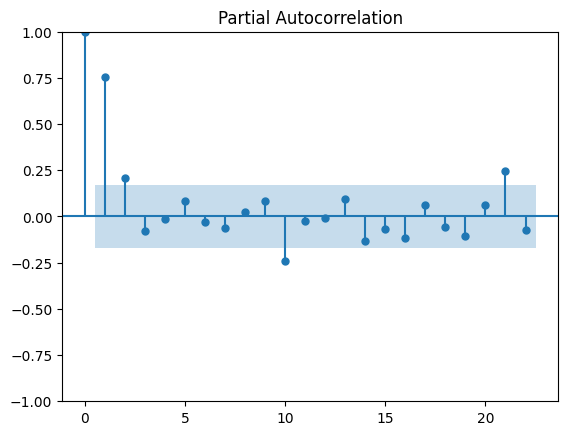

In [33]:
pacf12=plot_pacf(df_airlines[' passenger 12 difference'].dropna())

In [36]:
##splitting of the data
df_airlines

,Thousands of Passengers,First passenger difference,Second passenger difference,passenger 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [35]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

train_data=df_airlines[:train_dataset_end]
test_data=df_airlines[train_dataset_end+timedelta(days=1):test_dataset_end]
##prediction

pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]


In [42]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [56]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(4,2,3))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [57]:
model_Arima_fit=model_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(4, 2, 3)   Log Likelihood                -355.974
Date:                     Thu, 27 Jul 2023   AIC                            727.948
Time:                             07:16:46   BIC                            747.201
Sample:                         01-01-1949   HQIC                           735.678
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3330      0.134     -2.484      0.013      -0.596      -0.070
ar.L2         -0.8533      0.134     -6.350      0.000      -1.117      -0.590
ar.L3          0.1155      0.135      0.856      0.392      -0.149       0.380
ar.L4         -0.4252      0.135     -3.158      0.002      -0.689      -0.161
ma.L1         -0.2988     36.632     -0.008      0.993     -72.096      71.499
ma.L2          0.2861     25.682      0.011      0.991     -50.050      50.622
ma.L3         -0.9871     36.226     -0.027      0.978     -71.989      70.015
sigma2       307.2313   1.13e+04      0.027      0.978   -2.18e+04    2.24e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.60   Prob(JB):                         0.77
Heteroskedasticity (H):               3.64   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [60]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

<Axes: ylabel='Density'>

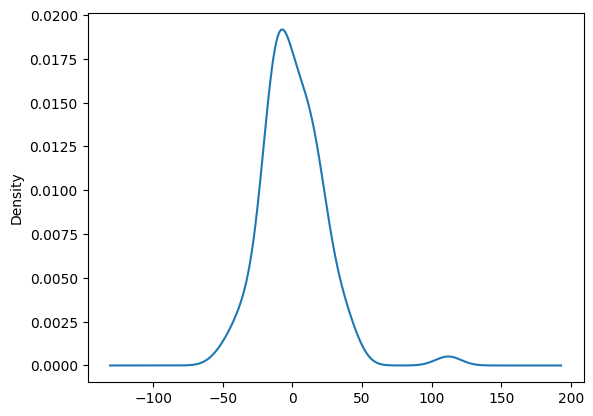

In [61]:
model_Arima_fit.resid.plot(kind='kde')

In [62]:
test_data['Predicted_arima']=pred


<ipython-input-62-1a9294fa0087>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_arima']=pred


<Axes: xlabel='Month'>

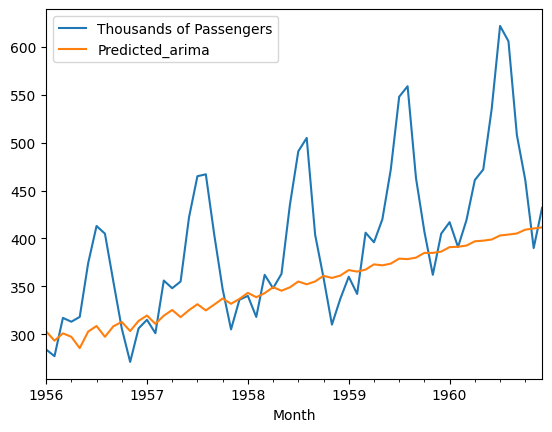

In [63]:
test_data[['Thousands of Passengers','Predicted_arima']].plot()

In [64]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [65]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Thu, 27 Jul 2023   AIC                            548.481
Time:                                     07:23:00   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5981      0.938      0.638      0.524      -1.239       2.436
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.163      0.158      0.874      -2.095       2.463
ma.L2         -0.5340      1.260     -0.424      0.672      -3.004       1.936
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.653
ma.L4         -0.1273      0.337     -0.378      0.705      -0.787       0.533
ma.L5          0.2471      0.356      0.694      0.488      -0.451       0.945
sigma2        87.7331     80.954      1.084      0.278     -70.934     246.400
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)


1956-01-01 00:00:00
1960-12-01 00:00:00


In [68]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: ylabel='Density'>

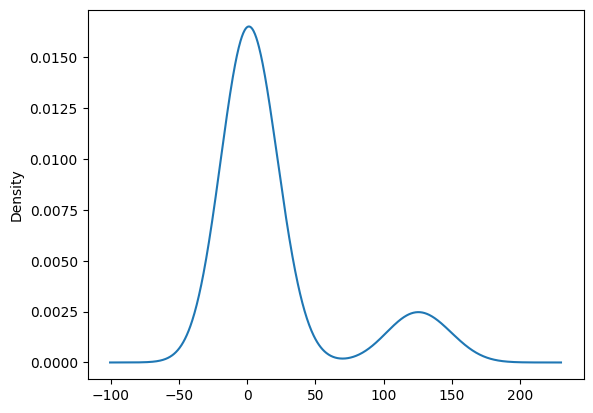

In [69]:

model_SARIMA_fit.resid.plot(kind='kde')

In [70]:

test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-70-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<Axes: xlabel='Month'>

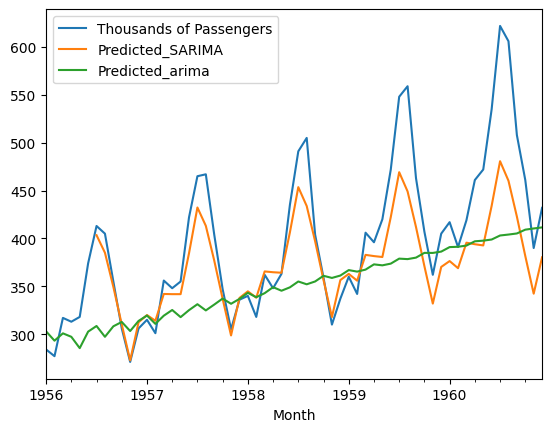

In [72]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_arima']].plot()